In [1]:
from scipy.io import loadmat, savemat

import numpy as np

In [142]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.metrics import f1_score, precision_score

for c in range(5):
    for f in range(10):
        filename = 'encoding_3106_lrg/new_encoding_3106_lrg_' +str(c) + '_' +  str(f) + '.mat'
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']

        tmp = np.zeros(pred_y.shape)


        resauc = []
        for i in range(14):
            fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
            roc_auc = auc(fpr, tpr)
            resauc.append(roc_auc)


        resmcc = []
        resf1 = []
        for t in np.arange(0,1,0.01):
            tmp[pred_y < t] = 0
            tmp[pred_y >= t] = 1
            for i in range(14):
                resmcc.append(matthews_corrcoef(test_y[:,i], tmp[:, i]))
                resf1.append(f1_score(test_y[:,i], tmp[:, i]))
        resmcc = np.array(resmcc).reshape((100, 14))
        resf1 = np.array(resf1).reshape((100, 14))

        print('{}, auc: {:.4f}, {:.4f}, mcc: {:.4f}, f1: {:.4f}'.format(f, 
            np.amax(resauc), np.average(resauc), np.amax(resmcc), np.amax(resf1)))
    #     print('{}, auc: {:.4f}, {:.4f}'.format(f,
    #             np.amax(resauc), np.average(resauc)))

0, auc: 0.8165, 0.7344, mcc: 0.3946, f1: 0.6238
1, auc: 0.8797, 0.8202, mcc: 0.5103, f1: 0.7024
2, auc: 0.8938, 0.8608, mcc: 0.5723, f1: 0.7349
3, auc: 0.9055, 0.8837, mcc: 0.6065, f1: 0.7545
4, auc: 0.9078, 0.8900, mcc: 0.6159, f1: 0.7614
5, auc: 0.9219, 0.8930, mcc: 0.6205, f1: 0.7619
6, auc: 0.9220, 0.8973, mcc: 0.6299, f1: 0.7669
7, auc: 0.9376, 0.9042, mcc: 0.6381, f1: 0.7778
8, auc: 0.9246, 0.9053, mcc: 0.6326, f1: 0.7667
9, auc: 0.9255, 0.9064, mcc: 0.6419, f1: 0.7775
0, auc: 0.8031, 0.7263, mcc: 0.3699, f1: 0.6305
1, auc: 0.8719, 0.8031, mcc: 0.5077, f1: 0.6933
2, auc: 0.8863, 0.8476, mcc: 0.5765, f1: 0.7416
3, auc: 0.9100, 0.8707, mcc: 0.5946, f1: 0.7491
4, auc: 0.9267, 0.8803, mcc: 0.6010, f1: 0.7500
5, auc: 0.9156, 0.8848, mcc: 0.6133, f1: 0.7639
6, auc: 0.9258, 0.8912, mcc: 0.6098, f1: 0.7619
7, auc: 0.9334, 0.8969, mcc: 0.6204, f1: 0.7700
8, auc: 0.9324, 0.8992, mcc: 0.6312, f1: 0.7704
9, auc: 0.9381, 0.8986, mcc: 0.6354, f1: 0.7755
0, auc: 0.8116, 0.7259, mcc: 0.3555, f1:

In [135]:
for f in range(10):
    filename = 'new_result_pssm/new_pssm_4802_' + str(f) + '.mat'
    result = loadmat(filename)
    test_y = result['test_y']
    pred_y = result['pred_y']

    tmp = np.zeros(pred_y.shape)
    
    resmcc = []
    resf1 = []
    for t in np.arange(0,1,0.01):
        tmp[pred_y < t] = 0
        tmp[pred_y >= t] = 1
        for i in range(37):
            resmcc.append(accuracy_score(test_y[:,i], tmp[:, i]))
            resf1.append(precision_score(test_y[:,i], tmp[:, i]))
    resmcc = np.array(resmcc).reshape((100, 37))
    resf1 = np.array(resf1).reshape((100, 37))

    print('{}, acc: {:.4f}, pre: {:.4f}'.format(f, np.amax(resmcc), np.amax(resf1)))

0, acc: 0.9999, pre: 1.0000
1, acc: 0.9999, pre: 1.0000
2, acc: 0.9999, pre: 1.0000
3, acc: 0.9999, pre: 1.0000
4, acc: 0.9999, pre: 1.0000
5, acc: 0.9999, pre: 1.0000
6, acc: 0.9999, pre: 1.0000
7, acc: 0.9999, pre: 1.0000
8, acc: 0.9999, pre: 1.0000
9, acc: 0.9999, pre: 1.0000


In [125]:
resmcc = np.array(resmcc).reshape((100, 37))
resf1 = np.array(resf1).reshape((100, 37))

In [128]:
np.amax(resauc)

0.9178154314147873

In [100]:
result

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Oct 13 17:07:17 2020',
 '__version__': '1.0',
 '__globals__': [],
 'pred_y': array([[7.3856791e-04, 1.6289729e-03, 3.6747148e-04, ..., 2.0673119e-03,
         7.9734059e-04, 3.6714372e-04],
        [1.2479783e-02, 4.7726668e-03, 6.7336950e-04, ..., 4.5304617e-04,
         1.5002469e-03, 3.7446222e-04],
        [2.4696470e-03, 1.6048219e-03, 5.9586775e-04, ..., 3.1644807e-04,
         9.4876916e-04, 3.6800368e-04],
        ...,
        [1.4670380e-02, 2.3559548e-03, 3.6275617e-04, ..., 3.5265419e-03,
         9.7754691e-04, 3.7543196e-04],
        [2.0957552e-04, 1.2722786e-05, 2.7459156e-04, ..., 8.2992519e-05,
         5.7043397e-04, 3.6817626e-04],
        [6.1473763e-04, 1.6422895e-03, 2.7175972e-04, ..., 1.3553054e-03,
         8.0976670e-04, 3.6877257e-04]], dtype=float32),
 'test_y': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, 

In [101]:
test_y = result['test_y']

In [102]:
pred_y = result['pred_y']

In [103]:
tmp = np.zeros(pred_y.shape)

In [71]:
tmp[pred_y < 0.3] = 0
tmp[pred_y >= 0.3] = 1

In [72]:
tmp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
np.amin(pred_y)

0.0002426045

In [36]:
pred_y

array([[0.00218197, 0.00264921, 0.00057168, ..., 0.00567965, 0.00200361,
        0.00124048],
       [0.00150887, 0.00293693, 0.00043915, ..., 0.00382916, 0.0017069 ,
        0.00112543],
       [0.00352711, 0.00457331, 0.00062335, ..., 0.00524639, 0.00209365,
        0.00158105],
       ...,
       [0.00720586, 0.00861815, 0.00100143, ..., 0.00810077, 0.00331353,
        0.00250639],
       [0.0014179 , 0.00181723, 0.00041279, ..., 0.00410459, 0.00140878,
        0.00089761],
       [0.00190351, 0.00237175, 0.00049859, ..., 0.00317534, 0.00176481,
        0.00108573]], dtype=float32)

In [96]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, precision_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [63]:
accuracy_score(test_y[:, 0], tmp[:, 0])

0.9960679177837355

In [117]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

for i in range(37):
    fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
    roc_auc = auc(fpr, tpr)
    print(roc_auc)

# # plot ROC
# import matplotlib.pyplot as plt
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange',
#          lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic class ')
# plt.legend(loc="lower right")
# plt.show()

0.7874716571782784
0.8889420606372046
0.8345946610624217
0.899236564540432
0.8415383501569049
0.9019988512801146
0.8763382307927763
0.8090331709617871
0.8590003758794431
0.7884208031495563
0.8675712087744055
0.8908688630490955
0.8879223612252559
0.8324986585583974
0.7203599415988796
0.9076255457364014
0.8396511627906977
0.8214246341261748
0.3845638183768323
0.8383255904177322
0.9178154314147873
0.7099970131421744
0.7865859340190187
0.576924452391596
0.873741128880909
0.8764998749009195
0.8658233691951518
0.8886244739940398
0.5304790847336431
0.880701071080818
0.8953969667570378
0.5432799785388536
0.737571530758226
0.5467993510558118
0.8021526653474846
0.868863627322274
0.7285829235583371


In [40]:
roc_auc

0.7150180252189942

In [25]:
test_y[:, 0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [28]:
print(pred_y[:, 0])

[0. 0. 0. ... 0. 0. 0.]


In [65]:
test_y.shape

(11190, 37)

In [116]:
for i in range(37):
    resmcc = []
    for t in np.arange(0,1,0.001):
        tmp[pred_y < t] = 0
        tmp[pred_y >= t] = 1
        resmcc.append(matthews_corrcoef(test_y[:,i], tmp[:, i]))
    print(np.amax(resmcc))

0.10598005454822297
0.20379268435989287
0.03766856326220824
0.4855190205979797
0.4878076315088179
0.31393704678906104
0.4280772035658725
0.048628721328335685
0.20002890306168425
0.17258806497009332
0.44766393769840435
0.5599142380001132
0.5158128938096403
0.04384043125749186
0.0
0.26149015779468304
0.02807669759494813
0.07253796872248466
0.0
0.2632378208705191
0.08287801564026752
0.055620820962982244
0.13704100601198935
0.0
0.5019944016582528
0.2168349330320817
0.38522493154388043
0.6304153916857096
0.0
0.29050268879527363
0.5981034111280363
0.0
0.0
0.0
0.15610795568374455
0.06527300856962985
0.0


In [115]:
np.unique(pred_y).shape

(390835,)

In [110]:
np.amax(resmcc)

0.1803921568627451

In [44]:
from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred)

-0.3333333333333333

In [49]:
tmp = np.array(tmp, dtype='uint8')

In [53]:
test_y[:, 0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [55]:
tmp[:,0].shape

(11190,)

In [143]:
from sklearn.metrics import label_ranking_average_precision_score as avgprec
from sklearn.metrics import coverage_error, label_ranking_loss

ap_list = []
rl_list = []
ce_list = []
for c in range(5):
    for f in range(20):
        filename = 'encoding_3106/new_encoding_3106_res_' +str(c) + '_' +  str(f) + '.mat'
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']
        
        ap_list.append(avgprec(test_y, pred_y))
        rl_list.append(label_ranking_loss(test_y, pred_y))
        ce_list.append(coverage_error(test_y, pred_y) - 1)

In [144]:
ap_values = np.array(ap_list).reshape((5,20))
rl_values = np.array(rl_list).reshape((5,20))
ce_values = np.array(ce_list).reshape((5,20))
    
with open('new_encoding_3106_uni.txt', 'w') as result_file:    
    result_file.write('the ap score is: \n')
    result_file.write(str(ap_values) + '\n')
    result_file.write('max is: {}'.format(np.amax(ap_values, axis = 1)) + '\n')    
    result_file.write('k-fold is: {}'.format(np.average(ap_values, axis = 0)) + '\n')
    result_file.write('k-fold max is: {}'.format(np.amax(np.average(ap_values, axis = 0))) + '\n')

    result_file.write('the rl score is: \n')
    result_file.write(str(rl_values) + '\n')
    result_file.write('min is: {}'.format(np.amin(rl_values, axis = 1)) + '\n')    
    result_file.write('k-fold is: {}'.format(np.average(rl_values, axis = 0)) + '\n')
    result_file.write('k-fold min is: {}'.format(np.amin(np.average(rl_values, axis = 0))) + '\n')

    result_file.write('the ce score is: \n')
    result_file.write(str(ce_values) + '\n')
    result_file.write('min is: {}'.format(np.amin(ce_values, axis = 1)) + '\n')    
    result_file.write('k-fold is: {}'.format(np.average(ce_values, axis = 0)) + '\n')
    result_file.write('k-fold min is: {}'.format(np.amin(np.average(ce_values, axis = 0))) + '\n')

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.metrics import f1_score, precision_score

In [47]:
res = []
for f in range(10):
    for c in range(5):
        filename = 'encoding_pssm_4802/new_encoding_pssm_4802_' +str(c) + '_' +  str(f) + '.mat'
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']

        resauc = []
        for i in range(37):
            if i in [18, 23, 28]:
                continue
            fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
            roc_auc = auc(fpr, tpr)
            resauc.append(roc_auc)
        print(f,c,np.amax(resauc), np.average(resauc))
        res.append(resauc)
            
tmp = np.array(res)

0 0 0.8032664103022715 0.6701520940789282
0 1 0.8136687631027253 0.6963505406941605


/home/pangaofeng/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


0 2 nan nan
0 3 0.9686540925478979 0.7007026177277327
0 4 0.8198233918590468 0.6537119656708048
1 0 0.9351989271345552 0.7458620318744847
1 1 0.8999433866690504 0.7691833886573292
1 2 nan nan
1 3 0.9101039897500074 0.753483013015722
1 4 0.8586518241864751 0.6972690968278118
2 0 0.9058202950379973 0.790360061671119
2 1 0.9537558475611573 0.8124882875367265
2 2 nan nan
2 3 0.8994231557180626 0.800162965282434
2 4 0.8968497603463096 0.7629486790839112
3 0 0.9123613595706619 0.811607471871308
3 1 0.9500312863144721 0.8415008177442854
3 2 nan nan
3 3 0.9061851233299075 0.8110668041112886
3 4 0.9157679575501889 0.7847382639077791
4 0 0.9308151725645688 0.8258755850748393
4 1 0.971874441065999 0.8579611170262711
4 2 nan nan
4 3 0.9632907243526714 0.8329980017070567
4 4 0.953524063839891 0.8093860469134087
5 0 0.961045026781544 0.8441646121930828
5 1 0.9751833303523519 0.8631727480312079
5 2 nan nan
5 3 0.9568248860284259 0.837957915486411
5 4 0.9599803255231623 0.8237688914667792
6 0 0.959017

In [42]:
import matplotlib.pyplot as plt

9 0 0.9278935495731846 0.8050935363541195 0.6155714033804625
9 1 0.8997409554101913 0.7866895929306121 0.3807820696232713
9 2 0.8956855114426064 0.7815325929458026 0.504016154029566
9 3 0.9092174881648566 0.809970050608295 0.6438980777827448
9 4 0.9000849885381105 0.7643972684315349 0.46828625067048096
9 0 0.9450704448147133 0.8776001905050446 0.6845147609253842
9 1 0.9620169946332737 0.865116993154624 0.7337772613514479
9 2 0.9891902164192452 0.8792564513871127 0.7326792419095297
9 3 0.9951738314415944 0.8845849407783595 0.673265162130201
9 4 0.950208190481869 0.8621513266153442 0.48729274765909225
9 0 0.8359361018935486 0.6716999554563379 0.18470682874508398
9 1 0.8348878598627915 0.6743022439423902 0.34552118719828356
9 2 0.8498005364184489 0.6873865002937734 0.3943279377571096
9 3 0.8718750931140312 0.7023468432826991 0.40184175234689323
9 4 0.8278102575146555 0.6967324179309472 0.3134725451618673
9 0 0.9791710143199276 0.8694854454367906 0.6934114071160379
9 1 0.9810064354665713 0

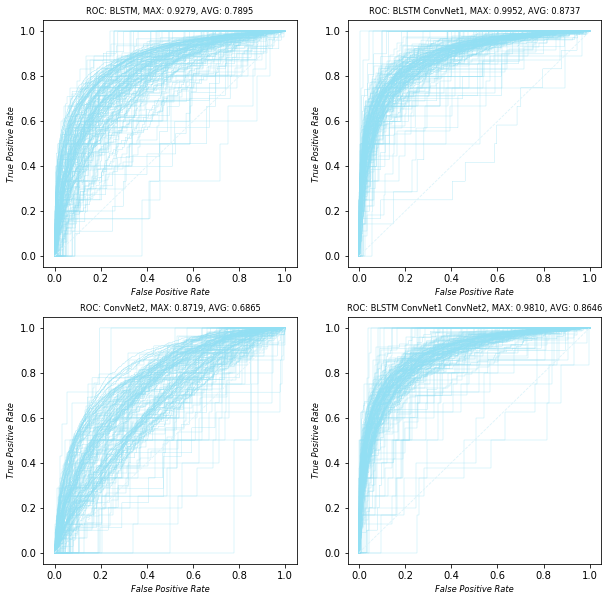

In [92]:
f, axs = plt.subplots(2,2,  figsize=(10,10))
fname = ['result_4802_', 'result_large-reg-4802_', 
         'result_pssm-conv-4802_', 'encoding_pssm_4802/new_encoding_pssm_4802_']
modelname = ['BLSTM', 'BLSTM ConvNet1', 'ConvNet2', 'BLSTM ConvNet1 ConvNet2']
res = []
for m in range(2):
    for n in range(2):
        tres = []
        for c in range(5):
            filename = fname[m*2+n] +str(c) + '_' +  '9.mat'
            result = loadmat(filename)
            test_y = result['test_y']
            pred_y = result['pred_y']

            resauc = []
            fig1 = axs[m,n]
            for i in range(37):
                if i in [18, 23, 28, 31]:
                    continue
                fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
                roc_auc = auc(fpr, tpr)
                resauc.append(roc_auc)
                fig1.plot(fpr, tpr, color='#92DFF3',
                     lw=0.3, label='ROC curve (area = %0.4f)' % roc_auc)
            print(9,c,np.amax(resauc), np.average(resauc), np.amin(resauc))
            tres.append(resauc)
        fig1.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.8, linestyle='--')
        # fig1.xlim([0.0, 1.0])
        # fig1.ylim([0.0, 1.0])
        # fig1.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        # fig1.ylabel()
        fig1.set_title('ROC: {}, MAX: {:.4f}, AVG: {:.4f}'.format(modelname[m*2 + n],
                                        np.amax(tres), np.average(tres)), fontsize = 'small')
        fig1.set_xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        fig1.set_ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
        res.append(tres)
plt.savefig('supp_auc_4802.png')

In [68]:
tmp = np.array(res)

In [69]:
tmp.shape

(4, 5, 33)

In [73]:
for i in range(4):
    for t in range(33):
        fval = tmp[i, :, t]
        print('{} {} {:.4f} {:.4f} {:.4f}'.format(i, t, 
                    np.amax(fval), np.average(fval), np.std(fval, dtype=np.float64)))

0 0 0.8368 0.7966 0.0389
0 1 0.8714 0.8445 0.0209
0 2 0.8915 0.7223 0.1449
0 3 0.8838 0.8788 0.0034
0 4 0.8327 0.8211 0.0079
0 5 0.8001 0.7732 0.0142
0 6 0.8580 0.8250 0.0190
0 7 0.8830 0.7429 0.0844
0 8 0.8580 0.8008 0.0317
0 9 0.7767 0.7504 0.0186
0 10 0.8193 0.7884 0.0201
0 11 0.8997 0.8908 0.0066
0 12 0.8454 0.8221 0.0144
0 13 0.8602 0.7777 0.0935
0 14 0.8606 0.7217 0.1470
0 15 0.9001 0.8710 0.0243
0 16 0.8861 0.7537 0.1208
0 17 0.8686 0.8212 0.0414
0 18 0.8896 0.8251 0.0373
0 19 0.9279 0.8269 0.0564
0 20 0.7934 0.6855 0.0609
0 21 0.8069 0.7595 0.0451
0 22 0.8704 0.8573 0.0098
0 23 0.8161 0.7694 0.0409
0 24 0.8643 0.8502 0.0075
0 25 0.8809 0.8747 0.0039
0 26 0.8455 0.7976 0.0406
0 27 0.8804 0.8713 0.0064
0 28 0.8470 0.6958 0.1141
0 29 0.8290 0.6371 0.1478
0 30 0.7072 0.6592 0.0277
0 31 0.9092 0.7779 0.0681
0 32 0.8589 0.7650 0.0889
1 0 0.9297 0.8852 0.0467
1 1 0.9260 0.9017 0.0195
1 2 0.9552 0.8749 0.0680
1 3 0.9364 0.9244 0.0080
1 4 0.8626 0.8599 0.0025
1 5 0.9191 0.8771 0.0250
1 

9 0 0.8992343604108312 0.8577467242052526 0.8084518828451883
9 1 0.9241509735176191 0.884110266180161 0.8314929756065005
9 2 0.9047672763408804 0.873630997143259 0.8301104692409039
9 3 0.9056812599316137 0.8740287976939162 0.8338811473956672
9 4 0.9080962673732162 0.8768196828673611 0.842752445403233
9 0 0.9255170737733093 0.9063890542223513 0.8793988194102381
9 1 0.9381015120145555 0.8985998547863175 0.855789742330343
9 2 0.9367850318866472 0.9012297003598554 0.8438000531930613
9 3 0.930244957735185 0.9043753705824944 0.8778533566731911
9 4 0.930195501591292 0.8945691126517491 0.8559599854936643
9 0 0.8714240947075209 0.7613103297609534 0.6463426232590317
9 1 0.8784718495699316 0.7684651067434072 0.6505957164122648
9 2 0.8653007419954639 0.7639046891666196 0.6600622266934788
9 3 0.852064644588443 0.7648976517329026 0.6524937125169279
9 4 0.8354883183917414 0.7620390536606455 0.6270495446089506
9 0 0.9363790664780762 0.900088287479959 0.8697281722184066
9 1 0.9457512077566272 0.9046398

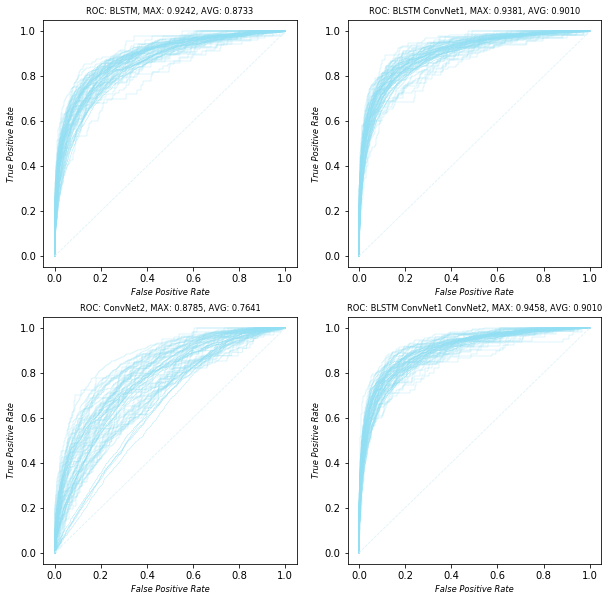

In [93]:
f, axs = plt.subplots(2,2,  figsize=(10,10))
fname = ['encoding_3106/new_encoding_3106_res_', 'encoding_3106_lrg/new_encoding_3106_lrg_', 
         'pssm_conv_3106/new_pssm_3106_', 'encoding_pssm_3106/new_encoding_pssm_3106_']
res = []
for m in range(2):
    for n in range(2):
        tres = []
        for c in range(5):
            filename = fname[m*2+n] +str(c) + '_' +  '9.mat'
            result = loadmat(filename)
            test_y = result['test_y']
            pred_y = result['pred_y']

            resauc = []
            fig1 = axs[m,n]
            for i in range(14):
#                 if i in [18, 23, 28, 31]:
#                     continue
                fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
                roc_auc = auc(fpr, tpr)
                resauc.append(roc_auc)
                fig1.plot(fpr, tpr, color='#92DFF3',
                     lw=0.3, label='ROC curve (area = %0.4f)' % roc_auc)
            print(9,c,np.amax(resauc), np.average(resauc), np.amin(resauc))
            tres.append(resauc)
            # res.append(resauc)
        fig1.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.8, linestyle='--')
        # fig1.xlim([0.0, 1.0])
        # fig1.ylim([0.0, 1.0])
        # fig1.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        # fig1.ylabel()
        fig1.set_title('ROC: {}, MAX: {:.4f}, AVG: {:.4f}'.format(modelname[m*2 + n],
                                        np.amax(tres), np.average(tres)), fontsize = 'small')
        fig1.set_xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        fig1.set_ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
        res.append(tres)
plt.savefig('supp_auc_3106.png')

In [76]:
tmp = np.array(res)
tmp.shape
for i in range(4):
    for t in range(14):
        fval = tmp[i, :, t]
        print('{} {} {:.4f} {:.4f} {:.4f}'.format(i, t, 
                    np.amax(fval), np.average(fval), np.std(fval, dtype=np.float64)))

0 0 0.9135 0.8992 0.0094
0 1 0.8501 0.8414 0.0072
0 2 0.9078 0.8847 0.0152
0 3 0.9018 0.8594 0.0374
0 4 0.8889 0.8644 0.0192
0 5 0.9057 0.8974 0.0061
0 6 0.8706 0.8575 0.0068
0 7 0.9242 0.9059 0.0097
0 8 0.9081 0.8817 0.0193
0 9 0.8894 0.8805 0.0100
0 10 0.8769 0.8710 0.0056
0 11 0.8480 0.8362 0.0096
0 12 0.8927 0.8834 0.0120
0 13 0.8997 0.8630 0.0260
1 0 0.9368 0.9302 0.0052
1 1 0.8834 0.8807 0.0021
1 2 0.9302 0.9163 0.0080
1 3 0.9230 0.8801 0.0233
1 4 0.8972 0.8921 0.0049
1 5 0.9225 0.9124 0.0060
1 6 0.9060 0.8928 0.0119
1 7 0.9381 0.9129 0.0176
1 8 0.9257 0.9040 0.0249
1 9 0.9228 0.9055 0.0132
1 10 0.8973 0.8962 0.0015
1 11 0.9134 0.8728 0.0246
1 12 0.9142 0.9097 0.0036
1 13 0.9379 0.9088 0.0247
2 0 0.8309 0.8222 0.0112
2 1 0.6601 0.6473 0.0111
2 2 0.8050 0.7812 0.0163
2 3 0.7622 0.7104 0.0277
2 4 0.7262 0.7055 0.0131
2 5 0.8785 0.8526 0.0177
2 6 0.7058 0.6934 0.0084
2 7 0.8443 0.8244 0.0191
2 8 0.8714 0.8246 0.0320
2 9 0.8391 0.8103 0.0153
2 10 0.7695 0.7611 0.0071
2 11 0.7788 0.75

In [77]:
tmp.shape

(4, 5, 14)

In [30]:
tmp = loadmat('result_4802_0_0.mat')

In [39]:
tmp['test_y'].shape

(11190, 37)

In [6]:
tmp.shape

(50, 34)

In [ ]:
import pandas as pd
pd.DataFrame(tmp)

In [18]:
tmp

array([[0.73976396, 0.78082213, 0.69992281, ..., 0.53690519, 0.66835399,
        0.61991954],
       [0.73909311, 0.7938586 , 0.52174132, ..., 0.50728803, 0.64271411,
        0.49659365],
       [0.74627057, 0.80155436, 0.57916256, ..., 0.54572071, 0.6735558 ,
        0.59738042],
       ...,
       [0.81913447, 0.80029248, 0.86786066, ..., 0.58550885, 0.76537509,
        0.60133366],
       [0.81818658, 0.79841175, 0.81261098, ..., 0.65636735, 0.67237882,
        0.61995887],
       [0.79712788, 0.81675022, 0.86684508, ..., 0.63480568, 0.74751976,
        0.65559331]])

In [19]:
np.amax(tmp)

nan

In [ ]:
for i in range(50):
    for j in range(34):
        print(tmp[i][j])

In [23]:
tmp[np.isnan(tmp)]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [59]:
Y_4802 = loadmat('Y_4802.mat')

In [60]:
Y_4802.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y_4802'])

In [61]:
t=loadmat('dataset_4802.mat')

In [62]:
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Header', 'Sequence', 'Y_4802', 'Y_4802_label'])

In [65]:
t['Y_4802_label']

array([[array(['Apical Plasma Membrane'], dtype='<U22')],
       [array(['Basolateral Plasma Membrane'], dtype='<U27')],
       [array(['Cellular Component Unknown'], dtype='<U26')],
       [array(['Centrosome'], dtype='<U10')],
       [array(['Cytoplasm'], dtype='<U9')],
       [array(['Cytoplasmic Vesicles'], dtype='<U20')],
       [array(['Cytoskeleton'], dtype='<U12')],
       [array(['ERGIC'], dtype='<U5')],
       [array(['Early Endosomes'], dtype='<U15')],
       [array(['Endoplasmic Reticulum'], dtype='<U21')],
       [array(['Endosomes'], dtype='<U9')],
       [array(['Extracellular'], dtype='<U13')],
       [array(['Golgi Apparatus'], dtype='<U15')],
       [array(['Golgi Cis Cisterna'], dtype='<U18')],
       [array(['Golgi Trans Cisterna'], dtype='<U20')],
       [array(['Golgi Trans Face'], dtype='<U16')],
       [array(['Inner Mitochondrial Membrane'], dtype='<U28')],
       [array(['Late Endosomes'], dtype='<U14')],
       [array(['Lipid Particles'], dtype='<U15')],
    

In [78]:
t=loadmat('dataset_3106.mat')

In [79]:
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y_3106', 'label_name', 'protein_list', 'sequence_3106'])

In [82]:
t['label_name']

array([[array(['Centrosome'], dtype='<U10')],
       [array(['Cytoplasm'], dtype='<U9')],
       [array(['Cytoskeleton'], dtype='<U12')],
       [array(['Endosome'], dtype='<U8')],
       [array(['Endoplasmic-Reticulum'], dtype='<U21')],
       [array(['Extracellular'], dtype='<U13')],
       [array(['Golgi-Apparatus'], dtype='<U15')],
       [array(['Lysosome'], dtype='<U8')],
       [array(['Microsome'], dtype='<U9')],
       [array(['Mitochondrion'], dtype='<U13')],
       [array(['Nucleus'], dtype='<U7')],
       [array(['Peroxisome'], dtype='<U10')],
       [array(['Plasma-Membrane'], dtype='<U15')],
       [array(['Synapse'], dtype='<U7')]], dtype=object)